In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import KFold

In [2]:
# Data params
textures = 11
trials = 100

# Set bin and sim params
bin_size = 10   # Bin size in ms
sim_length = 300   # Sim time in ms
bins = sim_length / bin_size

In [3]:
# Import dataset and labels from pickle
PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/datasets/TacTip_NM/histogram_classifier/"
DATA_NAME = str(sim_length) + "ms - " + str(bin_size) + "ms bin size dataset.pickle"
LABEL_NAME = str(textures) + " textures - " + str(trials) + " trials labels.pickle"

# Import dataset first
FILENAME = PATH + DATA_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        dataset = pickle.load(openfile)
    except EOFError:
        print(EOFError)
        
# Now import label array
FILENAME = PATH + LABEL_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        labels = pickle.load(openfile)
    except EOFError:
        print(EOFError)

In [4]:
# WARNING: Dataset created from previous script contains a NULL row 0
#          This row has currently been deleted and saved over the initial dataset
#          Note for next time is to fix this bug
#print(dataset[0])
#dataset = np.delete(dataset, 0, 0)
#print(len(dataset))
if len(dataset) == 1101:
    dataset = np.delete(dataset, 0, 0)
    
# Split data into testing and training
# Ration currently 80-20
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2)

In [5]:
# Create kfold validation model
kf = KFold(n_splits=10, random_state=63, shuffle=True)

In [6]:
# Use sklearn accuracy metrics to asses

max_it = 400

# accuracy_scores = []
# recall_scores = []
# precision_scores = []
train_accuracies = [[] for _ in range(400)] #int(max_it / 10
val_accuracies = [[] for _ in range(400)]

x_train = np.array(x_train)
y_train = np.array(y_train)

m = 0

for n in range(0,max_it,10):
    
    # Create neural network with n training iterations
    clf = MLPClassifier(hidden_layer_sizes=100, max_iter = n+1)
    
    # Loop through each of the folds within the kfold
    for train_index, val_index in kf.split(x_train):
        # Create folded data
        Xtrain, Xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]
        
        # Fit the model to the new folded training data
        clf.fit(Xtrain, ytrain)

        # Precit value using KNN
        pred_train = clf.predict(Xtrain)
        pred_val = clf.predict(Xval)

        #Calculate the accuracy of the predictions on the training set 
        #and save in the variable train_accuracies
        train_accuracies[m].append(accuracy_score(ytrain, pred_train))
        #train_accuracies[m].append(recall_score(ytrain, pred_train, average='micro'))
        #train_accuracies[m].append(precision_score(ytrain, pred_train, average='micro'))
        
        #Do the same for the predictions on the validation set
        val_accuracies[m].append(accuracy_score(yval, pred_val))
        #val_accuracies[m].append(recall_score(yval, pred_val, average='micro'))
        #val_accuracies[m].append(precision_score(yval, pred_val, average='micro'))
    m = m+1

/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
 

/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (31) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (31) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (31) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (31) reached and the optimization hasn't converged ye

/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged ye

/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converge

/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converge

/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converge

/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (221) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (221) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (221) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (231) reached and the optimization hasn't converge

In [7]:
#Calculate the mean for training and validation accuracies
train_accuracy_mean = np.mean(train_accuracies)
val_accuracy_mean = np.mean(val_accuracies)

/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [8]:
print(np.mean(train_accuracy_mean))
print(np.mean(val_accuracy_mean))

0.0014203361742424242
0.0007318892045454545


In [9]:
print(len(train_accuracies))
print(train_accuracies)

400
[[0.10732323232323232, 0.09595959595959595, 0.10606060606060606, 0.1388888888888889, 0.12373737373737374, 0.08964646464646464, 0.09217171717171717, 0.08964646464646464, 0.09848484848484848, 0.07954545454545454], [0.18434343434343434, 0.17045454545454544, 0.1527777777777778, 0.21464646464646464, 0.21717171717171718, 0.16414141414141414, 0.1994949494949495, 0.14646464646464646, 0.20075757575757575, 0.2058080808080808], [0.2840909090909091, 0.26136363636363635, 0.23484848484848486, 0.24873737373737373, 0.255050505050505, 0.26136363636363635, 0.25757575757575757, 0.273989898989899, 0.2222222222222222, 0.22601010101010102], [0.2916666666666667, 0.3143939393939394, 0.2777777777777778, 0.2916666666666667, 0.3345959595959596, 0.31691919191919193, 0.29924242424242425, 0.29924242424242425, 0.29292929292929293, 0.3042929292929293], [0.3560606060606061, 0.36363636363636365, 0.31313131313131315, 0.39015151515151514, 0.3686868686868687, 0.3409090909090909, 0.36742424242424243, 0.3257575757575757

In [10]:
# data_dir = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/"
# pickle_out = open(os.path.join(data_dir, "neural_accuracy.pickle"), 'wb')
# pickle.dump(dataset, pickle_out)
# pickle_out.close()

In [11]:
new_accuracies = []
new_val = []

for p in range(len(train_accuracies)):
    new_accuracies.append(np.mean(train_accuracies[p]))
    new_val.append(np.mean(val_accuracies[p]))

    
new_val = np.array(new_val)
print(np.nanmean(new_val))

0.2927556818181818


/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


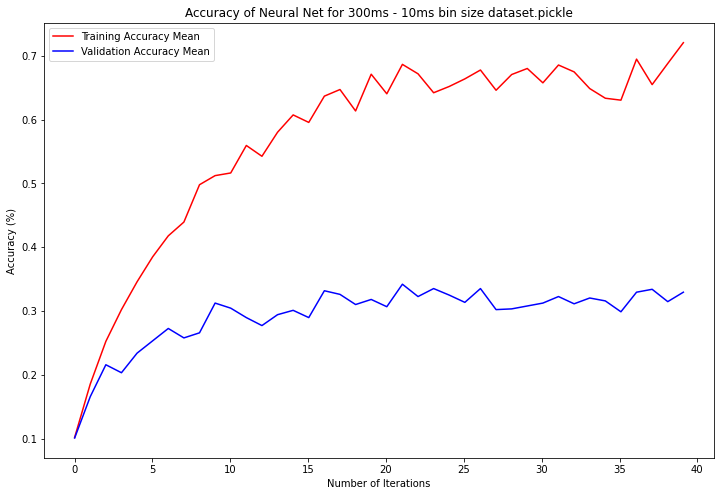

In [12]:
# Plot this data
x = np.linspace(0, max_it, len(new_accuracies))

fig, ax = plt.subplots(figsize=(12,8))

#ax.plot(x, train_accuracy_mean, color='r',label='Training Accuracy Mean')
ax.plot(x, new_accuracies, color='r',label='Training Accuracy Mean')
#ax.plot(x, val_accuracy_mean, color='b',label='Validation Accuracy Mean')
ax.plot(x, new_val, color='b',label='Validation Accuracy Mean')

plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Neural Net for " + DATA_NAME)
plt.savefig("/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/nn_iterations/" +
                    DATA_NAME + ".png")
ax.legend()
plt.show()